In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-challenge-2023-30412/sample_submission.csv
/kaggle/input/ml-challenge-2023-30412/train.csv
/kaggle/input/ml-challenge-2023-30412/test.csv
/kaggle/input/ml-challenge-2023-30412/poi.csv


In [613]:
import numpy as np 
import pandas as pd

import os
train = pd.read_csv('/kaggle/input/ml-challenge-2023-30412/train.csv')

# Read in the test.csv file
test = pd.read_csv('/kaggle/input/ml-challenge-2023-30412/test.csv')

# Read in the sample_submission.csv file
sample_submission_df = pd.read_csv('/kaggle/input/ml-challenge-2023-30412/sample_submission.csv')

# Read in the poi.csv file
poi_df = pd.read_csv('/kaggle/input/ml-challenge-2023-30412/poi.csv')

/tmp/ipykernel_35/4147250269.py:14: DtypeWarning: Columns (7,9,11,13,17,18,19,22,23,24,25,26,28,29,30,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,77,80,82,83,84,85,86,87,90,91,92,95) have mixed types. Specify dtype option on import or set low_memory=False.
  poi_df = pd.read_csv('/kaggle/input/ml-challenge-2023-30412/poi.csv')


,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
35687,6086,2550000,True,Buono stato / Abitabile,1930.0,41.8783,12.4825,175.0,0.0,0.0,NaN,NaN,1.0,5.0,5.0,1.0,1.0


In [4]:
train.isna().sum() ## discard energy efficiency and cosntruction years (too much NA)
                    ## impute surface from number of rooms
                    ## assume conditions if NA means livable
                    ## delete

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [573]:
train["balcony"].fillna(False,inplace=True) ## assume no balcony if nan
train["expenses"].fillna(0,inplace=True) ## assume no expenses if nan
train["garden"].fillna(False,inplace=True) ## assume no garden if nan
train["n_bathrooms"].fillna(1,inplace=True) ## assume 1 bathroom if nan 
train["elevator"].fillna(0,inplace=True) ## assume no elevator if nan
train["n_rooms"].fillna(1,inplace=True) ## asume 1 room apartment if not given
train["floor"].fillna(1,inplace=True) ## assume ground floor if not given
train["conditions"].fillna("Buono stato / Abitabile", inplace=True) ## assume livable conditions if conditions not given

In [78]:
#train["total_floors"].fillna((train["floor"]),inplace=True) ## assume the place is at the top floor and there is no negative floors if total floor is nan 
#train["floor"].fillna(train["total_floors"],inplace=True) ## assume ground floor if not given
#train["total_floors"].fillna(1,inplace=True) ## assume ground floor only 
#train["floor"].fillna(0,inplace=True) ## assume ground floor if not given
#train["total_floors"].loc[train["total_floors"]<0]=-train["total_floors"].loc[train["total_floors"]<0]+np.ones(4629) ## for cases in which the house was at the negative floor, we assume that there are at least negative ones upt to the floor + 1 ground floor

/tmp/ipykernel_35/3175758456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["total_floors"].loc[train["total_floors"]<0]=-train["total_floors"].loc[train["total_floors"]<0]+np.ones(4629) ## for cases in which the house was at the negative floor, we assume that there are at least negative ones upt to the floor + 1 ground floor


In [12]:
import matplotlib.pyplot as plt

In [580]:
train["latitude"].fillna(0,inplace=True) ## remove 13 unlocalised properties
train=train[train["latitude"]!=0]

In [618]:
train['surface'].fillna((train['n_rooms']+train["n_bathrooms"])*train["surface"].mean())

0         35.0
1        131.0
2         16.0
3        100.0
4         90.0
         ...  
46307     88.0
46308    189.0
46309    140.0
46310     70.0
46311    101.0
Name: surface, Length: 46312, dtype: float64

In [619]:
## encode conditions
train['conditions'] = [x if x !='Da ristrutturare' else 1 for x in train['conditions']]
train['conditions'] = [x if x !='Buono stato / Abitabile' else 2 for x in train['conditions']]
train['conditions'] = [x if x !='Ottimo / Ristrutturato' else 3 for x in train['conditions']]
train['conditions'] = [x if x !='Nuovo / Nuova costruzione' else 4 for x in train['conditions']]

In [30]:
import matplotlib.pyplot as plt

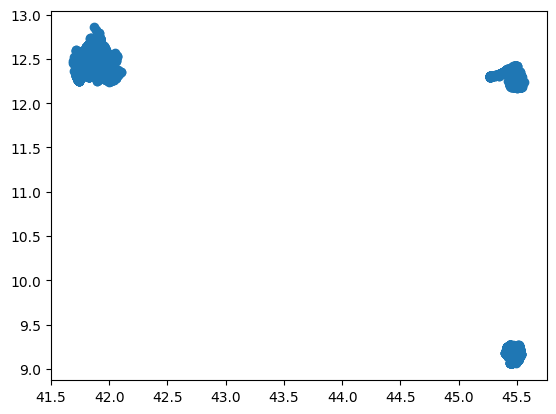

In [31]:
plt.scatter(train["latitude"], train["longitude"]) ## Milan, Venice and Rome, we need 3 separate models, add labels with city add the end or add variable [0,1] for each city

In [587]:
train["Milan"]=[1 if x<42.5 else 0 for x in train["latitude"]]
train["Rome"]=[1 if x>12*45 else 0 for x in train["latitude"]*train["longitude"]]
train["Venice"]=[1 if x<10 else 0 for x in train["longitude"]]

In [33]:
train["Rome"].sum().sum()+train["Milan"].sum().sum()+train["Venice"].sum().sum()==len(train["price"]) ## sanity check

True

In [621]:
train["Small"]=[1 if x<10 else 0 for x in train["surface"]]
train["Big"]=[1 if x>300 else 0 for x in train["surface"]]

In [620]:
train.loc[train["surface"]<20].mean()## price jumps very high with small apartments

id                     3.229697e+04
price                  4.993895e+06
balcony                1.000000e+00
conditions             2.078788e+00
construction_year      1.942618e+03
latitude               4.340776e+01
longitude              1.137058e+01
energy_efficiency      6.844685e+02
expenses               1.514203e+02
floor                  2.348684e+00
garden                 1.000000e+00
n_bathrooms            2.304348e+00
elevator               9.487179e-01
total_floors           3.673469e+00
n_rooms                2.955696e+00
proximity_to_center    9.971263e-01
surface                6.800000e+00
dtype: float64

KeyError: 'Small'

In [622]:
test["balcony"].fillna(False,inplace=True) ## assume no balcony if nan
test["expenses"].fillna(0,inplace=True) ## assume no expenses if nan
test["garden"].fillna(False,inplace=True) ## assume no garden if nan
test["n_bathrooms"].fillna(1,inplace=True) ## assume 1 bathroom if nan 
test["elevator"].fillna(0,inplace=True) ## assume no elevator if nan
test["total_floors"].fillna(1,inplace=True) ## assume 1 total floor if nan
test["n_rooms"].fillna(1,inplace=True) ## asume 1 room apartment if not given
test["floor"].fillna(0,inplace=True) ## assume ground floor if not given
test["conditions"].fillna("Buono stato / Abitabile", inplace=True) ## assume livable conditions if conditions not given
test['conditions'] = [x if x !='Da ristrutturare' else 1 for x in test['conditions']]
test['conditions'] = [x if x !='Buono stato / Abitabile' else 2 for x in test['conditions']]
test['conditions'] = [x if x !='Ottimo / Ristrutturato' else 3 for x in test['conditions']]
test['conditions'] = [x if x !='Nuovo / Nuova costruzione' else 4 for x in test['conditions']]

In [623]:
test["total_floors"].fillna((train["floor"]),inplace=True) ## assume 1 total floor if nan
test["floor"].fillna(train["total_floors"],inplace=True) ## assume ground floor if not given
test["total_floors"].fillna(1,inplace=True) ## assume ground floor only 
#test["floor"].fillna(0,inplace=True) ## assume ground floor if not given
#test["total_floors"].loc[test["total_floors"]<0]=-test["total_floors"].loc[test["total_floors"]<0]+np.ones(len(test["total_floors"].loc[test["total_floors"]<0])) ## for cases in which the house was at the negative floor, we assume that there are at least negative ones upt to the floor + 1 ground floor

In [42]:
test["total_floors"].value_counts()

1.0      8550
5.0      2422
4.0      2314
3.0      1900
2.0      1456
6.0      1145
8.0       861
7.0       851
9.0       205
10.0       41
11.0       19
12.0       19
14.0       17
17.0        8
13.0        8
15.0        6
18.0        6
23.0        5
20.0        3
16.0        3
28.0        2
22.0        2
466.0       1
56.0        1
70.0        1
25.0        1
30.0        1
Name: total_floors, dtype: int64

In [217]:
##test=test.drop(["construction_year","energy_efficiency"],axis=1)

In [624]:
test["latitude"].fillna(45.46, inplace=True)
test["longitude"].fillna(9.18, inplace=True) ##assume missing properties in terms of location are in Milan
test["proximity_to_center"].fillna(1,inplace=True) ## assume 1 total floor if nan
test['surface'].fillna(-2,inplace=True)
test['surface'].fillna(test['n_rooms']*test["surface"].mean())

0         72.0
1         60.0
2        140.0
3         98.0
4         83.0
         ...  
19843    135.0
19844    120.0
19845    112.0
19846     50.0
19847     50.0
Name: surface, Length: 19848, dtype: float64

In [625]:
test.isna().sum()

id                        0
balcony                   0
conditions                0
construction_year      5979
latitude                  0
longitude                 0
energy_efficiency      8593
expenses                  0
floor                     0
garden                    0
n_bathrooms               0
elevator                  0
total_floors              0
n_rooms                   0
proximity_to_center       0
surface                   0
dtype: int64

In [626]:
test["Milan"]=[1 if x<42.5 else 0 for x in test["latitude"]]
test["Rome"]=[1 if x>12*45 else 0 for x in test["latitude"]*test["longitude"]]
test["Venice"]=[1 if x<10 else 0 for x in test["longitude"]]

In [593]:
test["Small"]=[1 if x<20 else 0 for x in test["surface"]]
test["Big"]=[1 if x>300 else 0 for x in test["surface"]]

In [100]:
os.remove("train_transformed.csv")
os.remove("test_transformed.csv")

In [594]:
train.to_csv("train_transformed_2.csv",index=False)
test.to_csv("test_transformed_2.csv",index=False)

In [632]:
train=pd.read_csv("/kaggle/working/train_transformed_2.csv")
test=pd.read_csv("/kaggle/working/test_transformed_2.csv")

In [31]:
import sklearn.preprocessing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [354]:
pre_poly_data=pre_poly_data.drop(["pred"], axis=1)

In [534]:
pre_poly_data=(train.drop(["id","price"], axis=1))
pre_poly_data["construction_year"].fillna(pre_poly_data["construction_year"].mean(), inplace=True)
pre_poly_data["energy_efficiency"].fillna(pre_poly_data["energy_efficiency"].mean(), inplace=True)
poly=sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False,include_bias=False)
poly.fit(pre_poly_data)
x_t_pol=poly.transform(pre_poly_data)
labels=poly.get_feature_names_out(poly.feature_names_in_)
data=pd.DataFrame(data=x_t_pol, columns=labels)

In [ ]:
import sklearn.model_selection

In [527]:
y_data=np.log10(train["price"])
x_train, y_train=train.drop(["id","price"], axis=1),y_data

In [58]:
import sklearn.ensemble
import sklearn.metrics as metrics

In [255]:
x_power=sklearn.preprocessing.power_transform(x_train)

In [647]:
x_train

,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface,Milan,Rome,Venice,Small,Big
0,True,2,1980.0,41.901300,12.700000,175.00,30.0,2.0,False,1.0,0.0,3.0,1.0,1.00000,35.0,1,0,0,0,0
1,False,2,NaN,41.907017,12.481311,NaN,0.0,3.0,False,1.0,1.0,NaN,3.0,1.00000,131.0,1,0,0,0,0
2,False,2,1960.0,41.976500,12.440500,204.20,30.0,4.0,False,1.0,0.0,4.0,1.0,1.00000,16.0,1,0,0,1,0
3,False,3,NaN,45.484800,12.198200,175.00,0.0,1.0,True,1.0,0.0,1.0,2.0,0.99205,100.0,0,1,0,0,0
4,True,2,NaN,45.424480,12.328622,65.91,0.0,3.0,False,2.0,1.0,NaN,3.0,1.00000,90.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46255,True,2,1929.0,41.923500,12.446100,175.00,35.0,3.0,False,1.0,0.0,4.0,3.0,1.00000,88.0,1,0,0,0,0
46256,True,1,1920.0,41.916743,12.454925,NaN,170.0,6.0,False,2.0,1.0,NaN,5.0,1.00000,189.0,1,0,0,0,0
46257,True,2,NaN,45.454701,9.242711,NaN,0.0,1.0,False,2.0,1.0,NaN,3.0,1.00000,140.0,0,0,1,0,0
46258,True,2,1965.0,45.445605,9.245942,NaN,150.0,-1.0,True,1.0,1.0,NaN,3.0,1.00000,70.0,0,0,1,0,0


In [681]:
tree=sklearn.ensemble.HistGradientBoostingRegressor(categorical_features=["conditions"],loss="quantile", quantile=0.5)
tree.fit(x_train,y_train)
tree.score(x_train,y_train),metrics.mean_squared_error(10**tree.predict(x_train),10**y_train),np.sqrt(metrics.mean_squared_error(10**tree.predict(x_train),10**y_train))

(0.8259667840912337, 887892558304.2601, 942280.5093517854)

In [661]:
tree.score(x_test,y_test),metrics.mean_squared_error(10**tree.predict(x_test),10**y_test),np.sqrt(metrics.mean_squared_error(10**tree.predict(x_test),10**y_test))

(0.7301761197140562, 244200664225.66425, 494166.6360911714)

([<matplotlib.lines.Line2D at 0x784cad2a2920>,
  <matplotlib.lines.Line2D at 0x784cad2a3b20>])

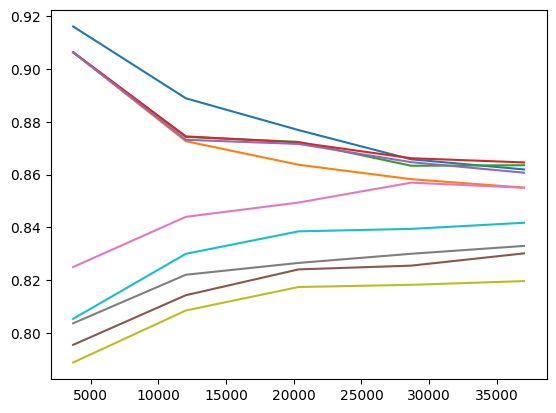

In [609]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores=learning_curve(estimator=tree,X=x_train,y=y_train)
plt.plot(train_sizes,train_scores),plt.plot(train_sizes,valid_scores)

In [610]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,x_train,y_train,cv=5)
score,score.mean(), score.std()

(array([0.83200988, 0.85602545, 0.83342399, 0.82142238, 0.84101529]),
 0.8367793979254248,
 0.011473435546619223)

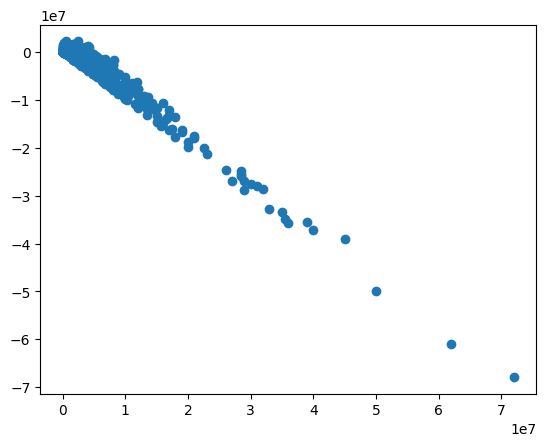

In [686]:
res=10**tree.predict(x_train)-10**y_train
plt.scatter(y=res,x=10**y_train)## there is a problem of estimating prices when proximity to center is 1 and price is high => detect luxury?

In [ ]:
import sklearn.model_selection

In [333]:
from sklearn import preprocessing

In [335]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(train[train.columns])
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(np.array(train["price"]).reshape(-1,1))

In [338]:
x_normalised=pd.DataFrame()
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(np.array(train["price"]).reshape(-1,1))
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in train.columns:
    x_normalised[col]=min_max_scaling(((train[col].astype(float))))
y_normalised=pd.DataFrame((scaler_y.transform(np.array(train["price"]).reshape(-1,1))), columns=["price"])

In [342]:
x_normalised=x_normalised.drop(["price","id"], axis=1)

In [414]:
pre_poly_data=test
pre_poly_data["energy_efficiency"].fillna(pre_poly_data["energy_efficiency"].mean(), inplace=True)
pre_poly_data["construction_year"].fillna(pre_poly_data["construction_year"].mean(), inplace=True)
poly=sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(pre_poly_data)
x_t_pol=poly.transform(pre_poly_data)
labels=poly.get_feature_names_out(poly.feature_names_in_)
data_test=pd.DataFrame(data=x_t_pol, columns=labels)

In [457]:
data_test=pd.DataFrame(sklearn.preprocessing.power_transform(data_test), columns=labels)
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in data_test.columns:
    data_test[col]=min_max_scaling((data_test[col]))

In [634]:
id_test=test["id"]
test=test.drop(["id"],axis=1)

In [635]:
prediction=tree.predict(test)
prediction=10**prediction
output=pd.DataFrame(data=id_test.astype(int))
output=output.rename(columns={ "Unnamed 0": "price"})
output["price"]=prediction
output["price"]=np.absolute(output["price"])

<AxesSubplot: >

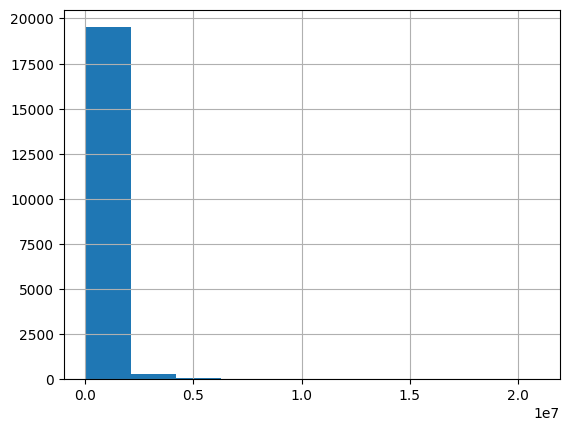

In [637]:
output["price"].hist()

In [646]:
train.loc[train["price"]>2e7]

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,...,elevator,total_floors,n_rooms,proximity_to_center,surface,Milan,Rome,Venice,Small,Big
5410,4504,26000000,False,3,NaN,45.485699,9.209500,NaN,0.0,0.0,...,0.0,11.0,1.0,1.000000,303.0,0,0,1,0,1
7724,22582,29000000,True,2,2001.0,45.515873,12.209193,NaN,100.0,3.0,...,1.0,NaN,3.0,0.899149,95.0,0,1,0,0,0
12064,31719,28500000,False,2,NaN,45.465000,9.191299,NaN,0.0,1.0,...,0.0,NaN,1.0,1.000000,500.0,0,0,1,0,1
12176,28472,40000000,False,1,NaN,45.463200,9.197830,NaN,0.0,1.0,...,0.0,NaN,5.0,1.000000,0.0,0,0,1,1,0
13352,33796,36000000,False,2,NaN,41.906200,12.490000,NaN,0.0,4.0,...,0.0,1.0,1.0,1.000000,0.0,1,0,0,1,0
14620,52250,21000000,False,2,NaN,45.463699,9.192800,NaN,0.0,6.0,...,0.0,1.0,1.0,1.000000,500.0,0,0,1,0,1
15083,62231,39000000,False,2,NaN,41.906200,12.490000,NaN,0.0,5.0,...,0.0,1.0,1.0,1.000000,800.0,1,0,0,0,1
15565,31222,45000000,False,3,NaN,41.882561,12.470400,NaN,0.0,0.0,...,0.0,1.0,5.0,1.000000,10.0,1,0,0,1,0
16578,31580,21000000,True,4,1900.0,41.917198,12.492300,175.00,0.0,3.0,...,0.0,1.0,5.0,1.000000,400.0,1,0,0,0,1
16854,36410,33000000,False,2,NaN,41.957001,12.457900,NaN,0.0,6.0,...,0.0,1.0,1.0,1.000000,14.0,1,0,0,1,0


In [451]:
max(output["price"]>1e7)

True

In [445]:
output.mean()

id       3.335657e+04
price    3.126756e+09
dtype: float64

In [678]:
max(output["price"])

6689415.709946854

id                      32968.278251
price                  483118.016332
balcony                     0.665686
conditions                  2.412503
latitude                   43.549886
longitude                  11.439695
expenses                   81.757815
floor                       1.973593
garden                      0.321890
n_bathrooms                 1.527241
elevator                    0.598209
total_floors                4.336092
n_rooms                     3.266200
proximity_to_center         0.994694
surface                   114.910155
dtype: float64

In [175]:
output.replace(np.inf, (output.loc[output["price"]<100000000])["price"].mean(), inplace=True)

In [ ]:
output.mean()

In [153]:
output.isinf.

id       0
price    0
dtype: int64

In [702]:
os.remove("submition_xgb.csv")

In [519]:
output["id"]=output["id"].astype(int)
output.to_csv("submition_ridge_poly_3.csv", index=False)

In [ ]:
prediction=(train["price"].mean()/train["surface"].mean())*test["surface"]
output=pd.DataFrame(data=[test["id"].astype(int),prediction]).T
output=output.rename(columns={ "Unnamed 0": "price"})
output["id"]=output["id"].astype(int)
output.to_csv("sumbission_naive.csv", index=False)

In [ ]:
(train["price"].mean()/train["surface"].mean())*train["surface"]